In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# default_path = "../lab10/raw_data/"
# app_train = pd.read_csv(default_path+"application_train.csv")
plt.rcParams['font.family'] = 'Malgun Gothic'
bureau = pd.read_csv('../../pjt2/raw_data/bureau.csv') # 로컬 경로
bureau_balance_df = pd.read_csv('../../pjt2/raw_data/bureau_balance_df.csv')
app = pd.read_csv('../../pjt2/raw_data/application_test.csv')

In [3]:
def check_feature(datasets, feature):
    print("=" * 20, "describe", "=" * 20)
    try:
        print(datasets[feature].describe())
    except:
        print("can't describe. dtype is", datasets[feature].dtype)
    print("=" * 50)
    
    print("=" * 20, "unique", "=" * 20)
    print(datasets[feature].unique())
    print("=" * 50)

    print("=" * 20, "value_counts", "=" * 20)
    print(datasets[feature].value_counts())
    print("=" * 50)

    print("=" * 20, "isna", "=" * 20)
    print(datasets[feature].isna().value_counts())
    print("=" * 50)
    
    return None

In [4]:
bureau_df = pd.DataFrame(bureau)
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [5]:
bureau_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [6]:
bureau_df.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [7]:
bureau_df.describe(include='object')

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


In [8]:
check_feature(bureau_df, 'CREDIT_ACTIVE')

==================== describe ====================
count     1716428
unique          4
top        Closed
freq      1079273
Name: CREDIT_ACTIVE, dtype: object
==================== unique ====================
['Closed' 'Active' 'Sold' 'Bad debt']
==================== value_counts ====================
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64
==================== isna ====================
False    1716428
Name: CREDIT_ACTIVE, dtype: int64


In [9]:
temp = bureau_df.loc[bureau_df['AMT_CREDIT_SUM_OVERDUE']>0]
temp2 = temp[temp['CREDIT_ACTIVE']=='Closed']
temp2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
9446,350002,5725982,Closed,currency 1,-2276,1715,-1972.0,-1724.0,NaN,0,16186.5,0.0,0.0,585.0,Consumer credit,-1714,NaN
17100,323596,5190659,Closed,currency 1,-2261,1572,-1957.0,-1575.0,NaN,0,113094.0,0.0,0.0,220.5,Consumer credit,-1571,NaN
33723,406327,5804754,Closed,currency 1,-449,0,-87.0,-87.0,NaN,0,160879.5,9.0,NaN,9.0,Consumer credit,-87,31868.91
43881,392205,5214368,Closed,currency 1,-2591,1694,-2103.0,-1699.0,NaN,0,26995.5,0.0,0.0,9.0,Consumer credit,-1693,NaN
46064,247863,5217154,Closed,currency 1,-2355,1651,-2051.0,-1656.0,NaN,0,16929.0,0.0,0.0,54.0,Consumer credit,-1650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628047,381777,5567059,Closed,currency 1,-2669,2347,-2487.0,-2109.0,NaN,0,38898.0,0.0,0.0,36.0,Consumer credit,-428,0.00
1655616,256906,6688027,Closed,currency 1,-2611,0,-1961.0,-1961.0,NaN,0,201928.5,NaN,NaN,4.5,Credit card,-1961,0.00
1679083,163338,6654943,Closed,currency 1,-2282,2220,-2124.0,-1358.0,NaN,0,16128.0,0.0,0.0,63949.5,Consumer credit,-1338,NaN
1696803,435904,5560835,Closed,currency 1,-1175,0,-444.0,-435.0,NaN,0,133029.0,0.0,0.0,76.5,Consumer credit,-426,NaN


In [10]:
check_feature(bureau_df, 'AMT_ANNUITY')

==================== describe ====================
count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64
==================== unique ====================
[      nan     0.     2691.    ...  7681.95   4482.585 24351.435]
==================== value_counts ====================
0.000        256915
4500.000       5182
13500.000      3147
22500.000      2502
9000.000       1725
              ...  
10886.625         1
28102.500         1
63567.000         1
13859.865         1
70096.500         1
Name: AMT_ANNUITY, Length: 40321, dtype: int64
==================== isna ====================
True     1226791
False     489637
Name: AMT_ANNUITY, dtype: int64


In [11]:
bureau_df.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [12]:
# Null 대상 feature
# DAYS_CREDIT_ENDDATE : Home Credit에 신청할 때 남은 CB 신용 기간(일)
# DAYS_ENDDATE_FACT : 대출 신청일 기준 CB 신용이 종료된 이후 경과 날짜(credit_active가 close인 데이터만 기록)
# AMT_CREDIT_MAX_OVERDUE : 현재까지 CB credit에서 지불 기한이 지난 미지불의 최댓값(우리 sample의 대출 신청 날짜 기준)
# AMT_CREDIT_SUM : 신용도에 대한 현재 채권액
# AMT_CREDIT_SUM_DEBT : 신용거래에 대한 현재 부채
# AMT_CREDIT_SUM_LIMIT : CB에 보고된 신용카드의 현재 신용 제한 
# AMT_ANNUITY : 연금액

# Null 처리
zero_imputation_lists = ["DAYS_CREDIT_ENDDATE",
                          "DAYS_ENDDATE_FACT",
                          "AMT_CREDIT_MAX_OVERDUE",
                          "AMT_CREDIT_SUM",
                          "AMT_CREDIT_SUM_DEBT",
                          "AMT_CREDIT_SUM_LIMIT",
                          "AMT_ANNUITY",
                         ]

for feature in zero_imputation_lists:
    bureau_df.loc[:, feature].fillna(0, inplace=True)

In [13]:
check_feature(bureau_df, 'CREDIT_DAY_OVERDUE')

==================== describe ====================
count    1.716428e+06
mean     8.181666e-01
std      3.654443e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.792000e+03
Name: CREDIT_DAY_OVERDUE, dtype: float64
==================== unique ====================
[   0 2603    6   30 2156  496  186 2264   41    8   71   13  252 1201
   12   38 1777  150   18   37   64 2050    9    4   29   22   49 1930
   34  951  936  664   45 2625  837   21   15   31 1715   19   67    7
   26   23   48   46   73   90 1127   53   33 1572   39 2582   14   25
   10   50   17  193   40   20   28  123  138  700  122 1504   32  670
   75  140   24  277 2019  161  962  187   58  106  634   83  120   60
   93 1694  227   44  344 2085 1248  124 1651 2541 1541  642  745  163
  234 1472  688 2455  614  319 2187   68  831  139  283  180   47  164
  174 1604 1326 2149   36   62  753  374 1573 1562 2400   35  860   11
  776  520   77 1892 1786   80 2310 2383  13

In [14]:
bureau_df.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
dtype: int64

In [15]:
corr = bureau_df.corr()
corr

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,1.000000,0.000135,0.000266,0.000283,0.000401,-0.000393,0.000769,-0.000388,0.001178,-0.000664,-0.000151,-0.000014,0.000510,-0.001522
SK_ID_BUREAU,0.000135,1.000000,0.013015,-0.002628,0.008642,0.009942,0.000988,-0.000740,0.007962,0.005777,-0.005078,-0.000499,0.019398,0.005599
DAYS_CREDIT,0.000266,0.013015,1.000000,-0.027266,0.216824,0.800601,-0.008575,-0.030460,0.050880,0.129944,0.028178,-0.000383,0.688771,0.004500
CREDIT_DAY_OVERDUE,0.000283,-0.002628,-0.027266,1.000000,-0.007197,0.010628,0.000755,0.002756,-0.003292,-0.002362,-0.000216,0.090951,-0.018461,-0.000318
DAYS_CREDIT_ENDDATE,0.000401,0.008642,0.216824,-0.007197,1.000000,0.272921,-0.000514,0.113631,0.054519,0.079092,0.047959,0.001037,0.241113,0.001986
DAYS_ENDDATE_FACT,-0.000393,0.009942,0.800601,0.010628,0.272921,1.000000,-0.001247,0.028917,0.112508,0.157197,0.080588,0.005014,0.769050,0.006048
AMT_CREDIT_MAX_OVERDUE,0.000769,0.000988,-0.008575,0.000755,-0.000514,-0.001247,1.000000,0.002896,0.033577,-0.000467,0.000600,0.004559,-0.001779,0.000266
CNT_CREDIT_PROLONG,-0.000388,-0.000740,-0.030460,0.002756,0.113631,0.028917,0.002896,1.000000,-0.008345,-0.003975,0.058382,0.000002,0.017864,-0.000438
AMT_CREDIT_SUM,0.001178,0.007962,0.050880,-0.003292,0.054519,0.112508,0.033577,-0.008345,1.000000,0.559132,0.001353,0.006342,0.104627,0.024947
AMT_CREDIT_SUM_DEBT,-0.000664,0.005777,0.129944,-0.002362,0.079092,0.157197,-0.000467,-0.003975,0.559132,1.000000,-0.011127,0.007701,0.137713,0.014804


<AxesSubplot:>

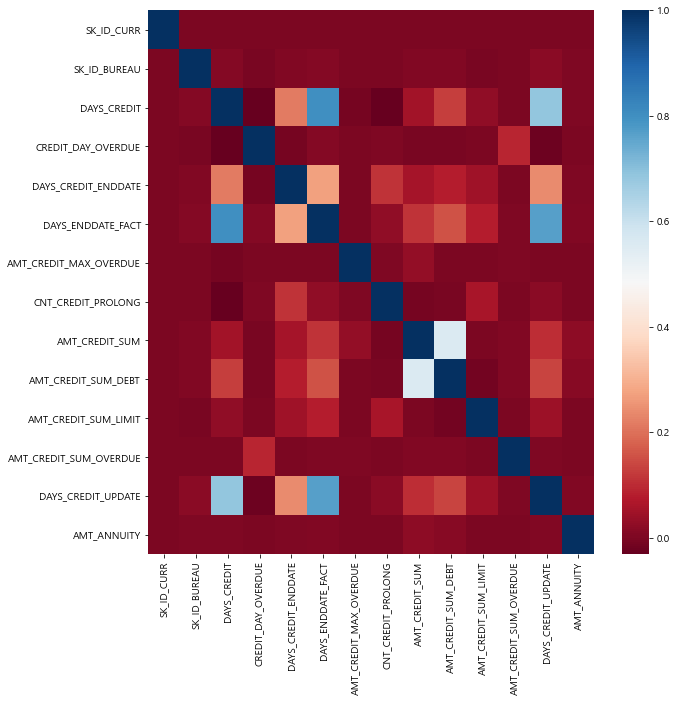

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu')

### AMT_ANNUITY 이상치 제거

In [17]:
bureau_df['AMT_ANNUITY'].describe()

count    1.716428e+06
mean     4.482301e+03
std      1.741693e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

In [18]:
# 전체 데이터 중 AMT_ANNUITY 0 이상인 비율
bureau_df[bureau_df['AMT_ANNUITY'] > 0]['AMT_ANNUITY'].count()/bureau_df['AMT_ANNUITY'].count()*100

13.558506386518982

In [19]:
# IQR을 이용한 Outlier 찾기 (행 위치 반환)
# 0 비율이 많아서 사용 부적절
def find_outlier_by_IQR(data) :
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    mask = np.where((data > upper_bound))
    return mask  

In [20]:
def box_plot(datasets, feature,  max_value=6):
    plt.figure(figsize=(15, 5))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=datasets[feature])

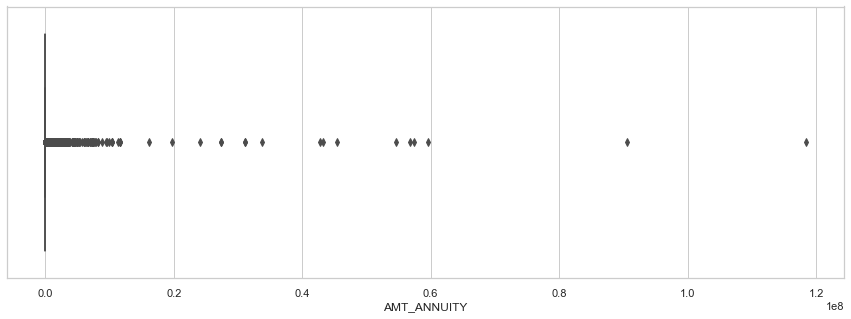

In [21]:
box_plot(bureau_df, 'AMT_ANNUITY',  max_value=6)

In [22]:
# 0.6e+08이상 인 이상치에 대해 0.6e+08으로 대체
bureau_df.loc[bureau_df['AMT_ANNUITY'] > 0.6e+08, 'AMT_ANNUITY'] = 0.6e+08

### object형 주요 feature 숫자로 변환

In [23]:
# 1 'CREDIT_ACTIVE' 
check_feature(bureau_df, 'CREDIT_ACTIVE')

==================== describe ====================
count     1716428
unique          4
top        Closed
freq      1079273
Name: CREDIT_ACTIVE, dtype: object
==================== unique ====================
['Closed' 'Active' 'Sold' 'Bad debt']
==================== value_counts ====================
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64
==================== isna ====================
False    1716428
Name: CREDIT_ACTIVE, dtype: int64


In [24]:
# 연체 가능성을 고려하여 CREDIT_ACTIVE_idx열 추가하여 숫자 변환
# Closed -> 0
# Active -> 1
# sold -> 5
# Bad debt -> 10
change_value = {'Closed':0, 'Active':1, 'Sold':5, 'Bad debt':10}
bureau_df['CREDIT_ACTIVE_idx'] = bureau_df['CREDIT_ACTIVE'].map(change_value)

In [25]:
bureau_df['CREDIT_ACTIVE_idx'].unique()

array([ 0,  1,  5, 10], dtype=int64)

In [26]:
# 2 'CREDIT_TYPE' 
check_feature(bureau_df, 'CREDIT_TYPE')

==================== describe ====================
count             1716428
unique                 15
top       Consumer credit
freq              1251615
Name: CREDIT_TYPE, dtype: object
==================== unique ====================
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
==================== value_counts ====================
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another

In [27]:
# CREDIT_TYPE 별 평균 연체일/ 연체금액 
credit = bureau_df.groupby('CREDIT_TYPE')[['CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE']].mean().sort_values(by=['CREDIT_DAY_OVERDUE'],ascending=False)
credit

,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE,,
Another type of loan,2.224189,8.747788
Consumer credit,0.934672,33.730585
Credit card,0.530526,43.577183
Car loan,0.452365,102.483478
Mortgage,0.303681,40.761813
Loan for business development,0.170633,703.299805
Loan for working capital replenishment,0.113006,83.686567
Microloan,0.027149,24.628011
Cash loan (non-earmarked),0.000000,0.000000


In [28]:
# StandardScaler 이용 CREDIT_DAY_OVERDUE & AMT_CREDIT_SUM_OVERDUE 표준화해서 복합 지표 생성
from sklearn.preprocessing import StandardScaler

# (1) StandardScaler 객체 생성  
scaler = StandardScaler()

# (2)(3) : data set 변환 - fit() , transform() 사용
overdue = bureau_df[['CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM_OVERDUE']]
scaler.fit(overdue)
overdue_scaled = scaler.transform(overdue) # numpy ndarray 반환
overdue_scaled = pd.DataFrame(data=overdue_scaled, columns=['CREDIT_DAY_OVERDUE_scaled','AMT_CREDIT_SUM_OVERDUE_scaled'])
credit = bureau_df['CREDIT_TYPE']
credit_idx = pd.concat([credit,overdue_scaled], axis=1, join='inner')

# (4) 복합지표 = scale된 두 feature의 합
credit_idx['overdue_idx'] = credit_idx['CREDIT_DAY_OVERDUE_scaled'] + credit_idx['AMT_CREDIT_SUM_OVERDUE_scaled']
credit_idx

,CREDIT_TYPE,CREDIT_DAY_OVERDUE_scaled,AMT_CREDIT_SUM_OVERDUE_scaled,overdue_idx
0,Consumer credit,-0.022388,-0.006385,-0.028773
1,Credit card,-0.022388,-0.006385,-0.028773
2,Consumer credit,-0.022388,-0.006385,-0.028773
3,Credit card,-0.022388,-0.006385,-0.028773
4,Consumer credit,-0.022388,-0.006385,-0.028773
...,...,...,...,...
1716423,Microloan,-0.022388,-0.006385,-0.028773
1716424,Consumer credit,-0.022388,-0.006385,-0.028773
1716425,Consumer credit,-0.022388,-0.006385,-0.028773
1716426,Consumer credit,-0.022388,-0.006385,-0.028773


In [29]:
credit_idx.groupby('CREDIT_TYPE')['overdue_idx'].mean().sort_values(ascending=False)

CREDIT_TYPE
Loan for business development                   0.094343
Another type of loan                            0.033562
Consumer credit                                 0.002484
Car loan                                        0.000865
Credit card                                    -0.006917
Loan for working capital replenishment         -0.011587
Mortgage                                       -0.013599
Microloan                                      -0.023883
Cash loan (non-earmarked)                      -0.028773
Real estate loan                               -0.028773
Interbank credit                               -0.028773
Loan for purchase of shares (margin lending)   -0.028773
Mobile operator loan                           -0.028773
Loan for the purchase of equipment             -0.028773
Unknown type of loan                           -0.028773
Name: overdue_idx, dtype: float64

In [30]:
# 복합지표의 평균이 높은 순으로 CREDIT_TYPE_idx 추가하여 숫자 변환
change_value = {'Loan for business development':8, 'Another type of loan':7, 'Consumer credit':6, 
                'Car loan':5, 'Credit card':4, 'Loan for working capital replenishment':3,
               'Mortgage':2, 'Microloan':1}
bureau_df['CREDIT_TYPE_idx'] = bureau_df['CREDIT_TYPE'].map(change_value)
bureau_df['CREDIT_TYPE_idx'].replace(np.nan, 0, inplace=True)

In [31]:
bureau_df.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'CREDIT_ACTIVE_idx', 'CREDIT_TYPE_idx'],
      dtype='object')

In [32]:
# 열 순서 변경 (idx값 앞으로)
bureau_df = bureau_df[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE_idx', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE_idx','CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY']]

In [33]:
merge2 = pd.merge(bureau_df, bureau_balance_df,on='SK_ID_BUREAU', how='inner')
merge2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_idx,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE_idx,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,380361,5715448,1,Active,currency 1,-820,0,31069.0,0.0,0.0,0,67500.0,0.00,67500.00,0.0,4.0,Credit card,-183,0.0,0
1,380361,5715449,1,Active,currency 1,-357,0,1119.0,0.0,0.0,0,45000.0,0.00,45000.00,0.0,4.0,Credit card,-130,2691.0,0
2,380361,5715451,0,Closed,currency 1,-917,0,-187.0,-759.0,0.0,0,74439.0,0.00,0.00,0.0,6.0,Consumer credit,-748,0.0,0
3,380361,5715452,0,Closed,currency 1,-993,0,31039.0,-831.0,0.0,0,315000.0,0.00,0.00,0.0,4.0,Credit card,-818,0.0,0
4,380361,5715453,0,Closed,currency 1,-1146,0,681.0,-780.0,0.0,0,2025000.0,0.00,0.00,0.0,6.0,Consumer credit,-769,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774349,229054,5053730,1,Active,currency 1,-456,0,1372.0,0.0,0.0,0,67500.0,63530.46,3969.54,0.0,4.0,Credit card,-3,0.0,0
774350,254479,5053734,1,Active,currency 1,-1571,0,986.0,0.0,0.0,0,142294.5,0.00,0.00,0.0,6.0,Consumer credit,-2,0.0,0
774351,363575,5053740,0,Closed,currency 1,-1234,0,-503.0,-502.0,0.0,0,900000.0,0.00,0.00,0.0,6.0,Consumer credit,-461,58554.0,0
774352,245498,5053747,0,Closed,currency 1,-2582,0,-2214.0,-2018.0,0.0,0,49495.5,0.00,0.00,0.0,6.0,Consumer credit,-2017,12600.0,0


In [34]:
774354 /1716428

0.4511427219784343

In [35]:
bureau_merge = pd.merge(bureau_df, bureau_balance_df,on='SK_ID_BUREAU', how='left')

In [36]:
bureau_merge.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_idx,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE_idx,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,0,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,6.0,Consumer credit,-131,0.0,NaN
1,215354,5714463,1,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,4.0,Credit card,-20,0.0,NaN
2,215354,5714464,1,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,6.0,Consumer credit,-16,0.0,NaN
3,215354,5714465,1,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,4.0,Credit card,-16,0.0,NaN
4,215354,5714466,1,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,6.0,Consumer credit,-21,0.0,NaN


In [37]:
# overdue 0일때 --> STATUS Null일때 0
# overdue 0 이상이면 --> STATUS Null일때 1
bureau_merge.loc[bureau_merge['CREDIT_DAY_OVERDUE'] == 0 & \
             bureau_merge['STATUS'].isna(),'STATUS'] = 0

bureau_merge.loc[bureau_merge['CREDIT_DAY_OVERDUE'] != 0 & \
             bureau_merge['STATUS'].isna(),'STATUS'] = 1

In [38]:
bureau_merge.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE_idx         0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE_idx           0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_ANNUITY               0
STATUS                    0
dtype: int64

In [39]:
bureau_merge.loc[bureau_merge['AMT_CREDIT_MAX_OVERDUE']==0]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_idx,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE_idx,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,0,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.00,0.00,0.0,6.0,Consumer credit,-131,0.0,0.0
1,215354,5714463,1,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.00,0.00,0.0,4.0,Credit card,-20,0.0,0.0
2,215354,5714464,1,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.00,0.00,0.0,6.0,Consumer credit,-16,0.0,0.0
3,215354,5714465,1,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.00,0.00,0.0,4.0,Credit card,-16,0.0,0.0
5,215354,5714467,1,Active,currency 1,-273,0,27460.0,0.0,0.0,0,180000.0,71017.38,108982.62,0.0,4.0,Credit card,-31,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716422,375755,5057742,0,Closed,currency 1,-2648,0,31129.0,-189.0,0.0,0,202500.0,0.00,0.00,0.0,4.0,Credit card,-109,0.0,0.0
1716423,259355,5057750,1,Active,currency 1,-44,0,-30.0,0.0,0.0,0,11250.0,11250.00,0.00,0.0,1.0,Microloan,-19,0.0,0.0
1716425,100044,5057762,0,Closed,currency 1,-1809,0,-1628.0,-970.0,0.0,0,15570.0,0.00,0.00,0.0,6.0,Consumer credit,-967,0.0,0.0
1716426,246829,5057770,0,Closed,currency 1,-1878,0,-1513.0,-1513.0,0.0,0,36000.0,0.00,0.00,0.0,6.0,Consumer credit,-1508,0.0,0.0


In [40]:
bureau_merge.loc[bureau_merge['SK_ID_CURR']==215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE_idx,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE_idx,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,STATUS
0,215354,5714462,0,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.00,0.00,0.0,6.0,Consumer credit,-131,0.0,0.0
1,215354,5714463,1,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.00,0.00,0.0,4.0,Credit card,-20,0.0,0.0
2,215354,5714464,1,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.00,0.00,0.0,6.0,Consumer credit,-16,0.0,0.0
3,215354,5714465,1,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.00,0.00,0.0,4.0,Credit card,-16,0.0,0.0
4,215354,5714466,1,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.00,0.00,0.0,6.0,Consumer credit,-21,0.0,0.0
5,215354,5714467,1,Active,currency 1,-273,0,27460.0,0.0,0.0,0,180000.0,71017.38,108982.62,0.0,4.0,Credit card,-31,0.0,0.0
6,215354,5714468,1,Active,currency 1,-43,0,79.0,0.0,0.0,0,42103.8,42103.80,0.00,0.0,6.0,Consumer credit,-22,0.0,0.0
225157,215354,5714458,0,Closed,currency 1,-1872,0,-776.0,-1203.0,0.0,0,494550.0,0.00,0.00,0.0,6.0,Consumer credit,-696,0.0,0.0
225158,215354,5714459,0,Closed,currency 1,-1734,0,-638.0,-1336.0,0.0,0,1084032.0,0.00,0.00,0.0,5.0,Car loan,-1336,0.0,0.0
225159,215354,5714460,0,Closed,currency 1,-1333,0,-1089.0,-987.0,0.0,0,102150.0,0.00,0.00,0.0,6.0,Consumer credit,-984,0.0,0.0


### 최종 파일 출력

In [41]:
# App_ID별 feature 집계값 파일 작성
# CREDIT_ACTIVE_idx : mean 사용. 기존 대출 상태의  평균 위험도
# CREDIT_TYPE_idx : mean 사용. 기존 대출 유형들의  평균 위험도
# CREDIT_DAY_OVERDUE : mean 사용. 기존 대출 건들의 평균 만기 경과일수
# AMT_CREDIT_MAX_OVERDUE : max 사용. 기존 대출건들의 연체금액 중 최대값
# AMT_CREDIT_SUM : sum 사용. 기존 대출건들의 총액
# AMT_CREDIT_SUM_DEBT : sum 사용. 기존 대출건들의 총 부채(미상환액)
# AMT_CREDIT_SUM_OVERDUE : sum 사용. 기존 대출건들의 총 연체금액
# AMT_ANNUITY : sum 사용. 기존 대출건들의 연금액
# STATUS : mean 사용. bureau_balance의 status 변환값(연체정도 나타냄)의 평균

bureau_final = bureau_merge.groupby('SK_ID_CURR').agg({'CREDIT_ACTIVE_idx':'mean',
                                                      'CREDIT_TYPE_idx':'mean',
                                                      'CREDIT_DAY_OVERDUE':'mean',
                                                      'AMT_CREDIT_MAX_OVERDUE':'max',
                                                      'AMT_CREDIT_SUM':'sum',
                                                      'AMT_CREDIT_SUM_DEBT':'sum',
                                                      'AMT_CREDIT_SUM_OVERDUE':'sum',
                                                      'AMT_ANNUITY':'sum',
                                                     'STATUS':'mean'})

bureau_final.rename(columns={'STATUS':'balance_STATUS'}, inplace=True)
bureau_final.head()

,CREDIT_ACTIVE_idx,CREDIT_TYPE_idx,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY,balance_STATUS
SK_ID_CURR,,,,,,,,,
100001,0.428571,6.000000,0.0,0.000,1453365.000,596686.5,0.0,24817.5,0.0
100002,0.250000,5.000000,0.0,5043.645,865055.565,245781.0,0.0,0.0,0.0
100003,0.250000,5.000000,0.0,0.000,1017400.500,0.0,0.0,0.0,0.0
100004,0.000000,6.000000,0.0,0.000,189037.800,0.0,0.0,0.0,0.0
100005,0.666667,5.333333,0.0,0.000,657126.000,568408.5,0.0,4261.5,0.0


In [42]:
bureau_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305811 entries, 100001 to 456255
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CREDIT_ACTIVE_idx       305811 non-null  float64
 1   CREDIT_TYPE_idx         305811 non-null  float64
 2   CREDIT_DAY_OVERDUE      305811 non-null  float64
 3   AMT_CREDIT_MAX_OVERDUE  305811 non-null  float64
 4   AMT_CREDIT_SUM          305811 non-null  float64
 5   AMT_CREDIT_SUM_DEBT     305811 non-null  float64
 6   AMT_CREDIT_SUM_OVERDUE  305811 non-null  float64
 7   AMT_ANNUITY             305811 non-null  float64
 8   balance_STATUS          305811 non-null  float64
dtypes: float64(9)
memory usage: 23.3 MB


In [43]:
# bureau_final.to_csv('../pre_data/bureau_final.csv')

In [44]:
print(app.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


In [46]:
app

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [53]:
merge_ds = pd.merge(bureau_final, app, on="SK_ID_CURR", how="left")
merge_ds.describe()

,SK_ID_CURR,CREDIT_ACTIVE_idx,CREDIT_TYPE_idx,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_x,balance_STATUS,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,305811.000000,305811.000000,305811.000000,305811.000000,3.058110e+05,3.058110e+05,3.058110e+05,3.058110e+05,3.058110e+05,305811.000000,...,42320.000000,42320.0,42320.0,42320.0,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000,42320.000000
mean,278047.300091,0.429345,5.421101,0.965926,6.276273e+03,1.992466e+06,6.539142e+05,2.127933e+02,2.486654e+04,0.002895,...,0.001512,0.0,0.0,0.0,0.002127,0.001819,0.002812,0.009381,0.547637,1.983648
std,102849.568343,0.351903,0.633821,24.957209,2.864231e+05,4.165820e+06,1.640691e+06,1.569161e+04,3.886657e+05,0.034447,...,0.038859,0.0,0.0,0.0,0.046577,0.046336,0.054276,0.111410,0.693653,1.837092
min,100001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-6.981558e+06,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188878.500000,0.200000,5.142857,0.000000,0.000000e+00,3.469676e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277895.000000,0.384615,5.500000,0.000000,0.000000e+00,9.788207e+05,1.733670e+05,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367184.500000,0.600000,6.000000,0.000000,1.935000e+02,2.345121e+06,6.765412e+05,0.000000e+00,9.805275e+03,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456255.000000,10.000000,8.000000,2776.000000,1.159872e+08,1.017958e+09,3.344983e+08,3.756681e+06,6.850427e+07,1.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


### 시각화

AMT_INCOME_TOTAL / AMT_CREDIT / AMT_ANNUITY 을 그룹별 feature로 

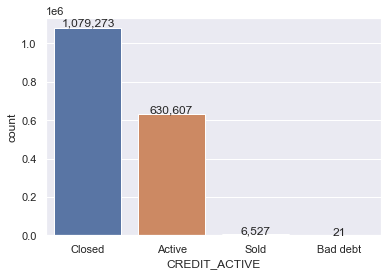

In [149]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="CREDIT_ACTIVE", data=bureau_df)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("{0:,}".format(int(height)), (left+width/2, height*1.01), ha='center')

In [130]:
credit= bureau_df.groupby('CREDIT_TYPE')['CREDIT_TYPE'].count()
ccredit_df = credit.to_frame()
ccredit_df.rename(columns={'CREDIT_TYPE':'count'},inplace=True)
credit_df.reset_index(inplace=True)

In [137]:
print(credit_df.sort_values(by='count', ascending=False)) 

                                     CREDIT_TYPE    count
3                                Consumer credit  1251615
4                                    Credit card   402195
1                                       Car loan    27690
12                                      Mortgage    18391
10                                     Microloan    12413
6                  Loan for business development     1975
0                           Another type of loan     1017
14                          Unknown type of loan      555
9         Loan for working capital replenishment      469
2                      Cash loan (non-earmarked)       56
13                              Real estate loan       27
8             Loan for the purchase of equipment       19
7   Loan for purchase of shares (margin lending)        4
5                               Interbank credit        1
11                          Mobile operator loan        1


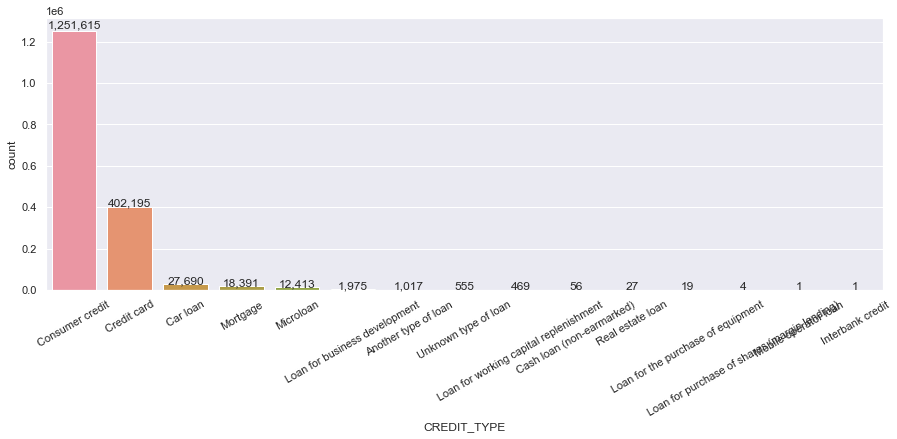

In [147]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(x="CREDIT_TYPE", data=bureau_df,order=bureau_df['CREDIT_TYPE'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("{0:,}".format(int(height)), (left+width/2, height*1.01), ha='center')

In [74]:
check_feature(bureau_df, 'CREDIT_ACTIVE')

==================== describe ====================
count             1716428
unique                 15
top       Consumer credit
freq              1251615
Name: CREDIT_TYPE, dtype: object
==================== unique ====================
['Consumer credit' 'Credit card' 'Mortgage' 'Car loan' 'Microloan'
 'Loan for working capital replenishment' 'Loan for business development'
 'Real estate loan' 'Unknown type of loan' 'Another type of loan'
 'Cash loan (non-earmarked)' 'Loan for the purchase of equipment'
 'Mobile operator loan' 'Interbank credit'
 'Loan for purchase of shares (margin lending)']
==================== value_counts ====================
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another